Manifold Learning

In [116]:
import opendatasets as od 
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_path = "datasets/"
if not os.path.exists(dataset_path):
    os.mkdir(dataset_path)
%cd $dataset_path
od.download("https://www.kaggle.com/datasets/hojjatk/mnist-dataset") 
od.download("https://www.kaggle.com/datasets/yasserh/wine-quality-dataset") 
%cd -


c:\Users\brand\Documents\Research\Machine_Learning\machine_learning\manifold_learning\datasets
Skipping, found downloaded files in ".\mnist-dataset" (use force=True to force download)
Skipping, found downloaded files in ".\wine-quality-dataset" (use force=True to force download)
c:\Users\brand\Documents\Research\Machine_Learning\machine_learning\manifold_learning


c:\Users\brand\miniconda3\envs\machine_learning\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


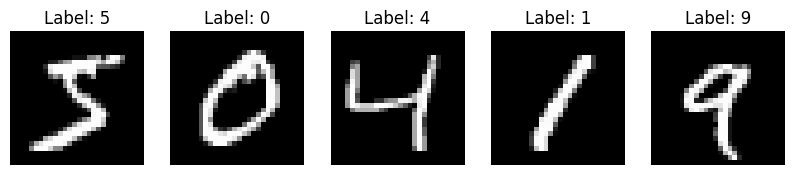

In [117]:
from util import load_idx

train_images_path = "datasets/mnist-dataset/train-images.idx3-ubyte"
train_labels_path = "datasets/mnist-dataset/train-labels.idx1-ubyte"
test_images_path = "datasets/mnist-dataset/t10k-images.idx3-ubyte"
test_labels_path = "datasets/mnist-dataset/t10k-labels.idx1-ubyte"

for dirname, _, filenames in os.walk('/datasets/mnist-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#plot the numbers
def plot_numbers(images, labels, num_size=5):
    plt.figure(figsize=(10,2))
    for i in range(num_size):
        plt.subplot(1,num_size, i+1)
        plt.imshow(images[i], cmap="gray")
        plt.axis("off")
        plt.title(f"Label: {labels[i]}")


class MNIST():
    def __init__(self,):
        self.X_train = load_idx(train_images_path)
        self.X_test = load_idx(test_images_path)
        self.y_train = load_idx(train_labels_path)
        self.y_test = load_idx(test_labels_path)
    def plot(self,):
        plot_numbers(self.X_train,self.y_train)
    def add(self,xtrain,xtest,ytrain,ytest):
        self.xtrain,self.xtest,self.ytrain,self.ytest = xtrain,xtest,ytrain,ytest
        

mnist = MNIST()
mnist.plot()

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('datasets/wine-quality-dataset/WineQT.csv')
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

class winequal():
    def __init__(self,):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.1, random_state=42)
        scaler = StandardScaler()
        self.X_train_scaled = scaler.fit_transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)
        self.y_train, self.y_test = np.array(self.y_train), np.array(self.y_test)
    def add(self,xtrain,xtest,ytrain,ytest):
        self.xtrain,self.xtest,self.ytrain,self.ytest = xtrain,xtest,ytrain,ytest

wine = winequal()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


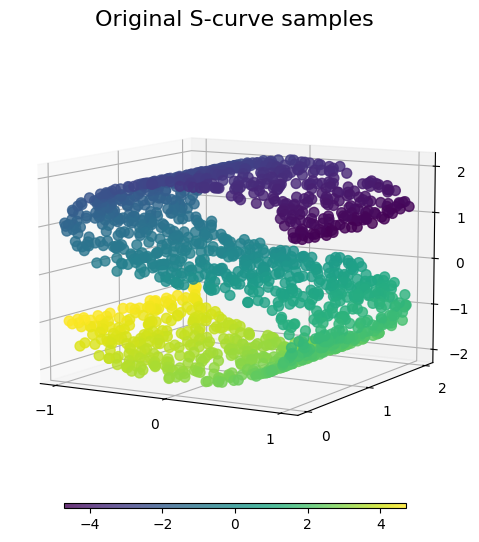

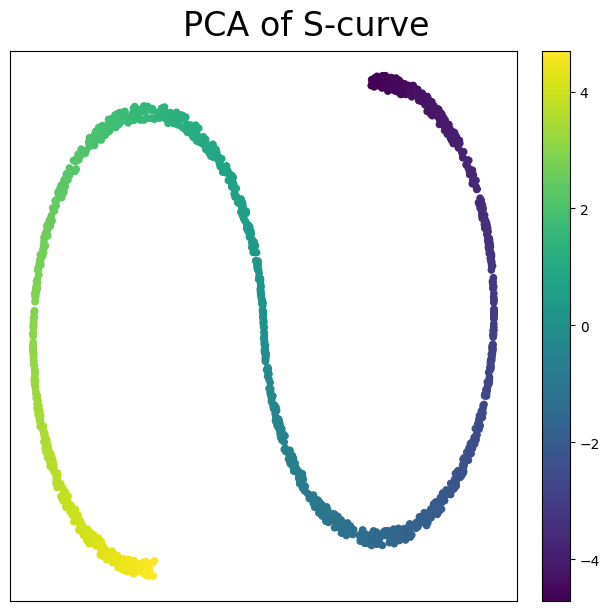

c:\Users\brand\miniconda3\envs\machine_learning\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


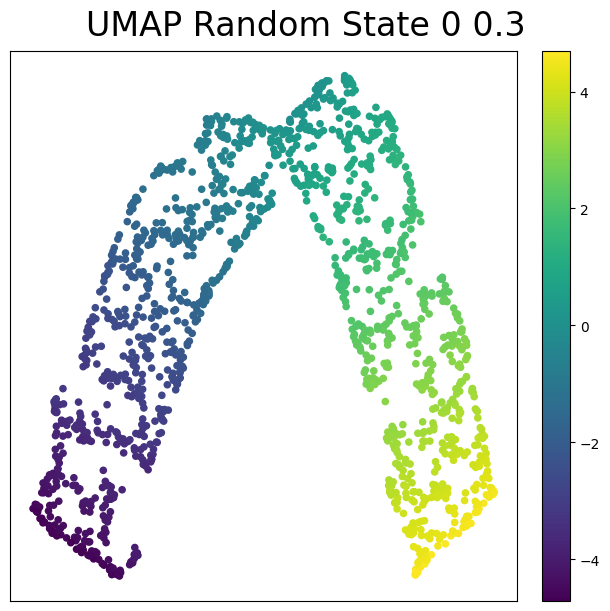

c:\Users\brand\miniconda3\envs\machine_learning\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


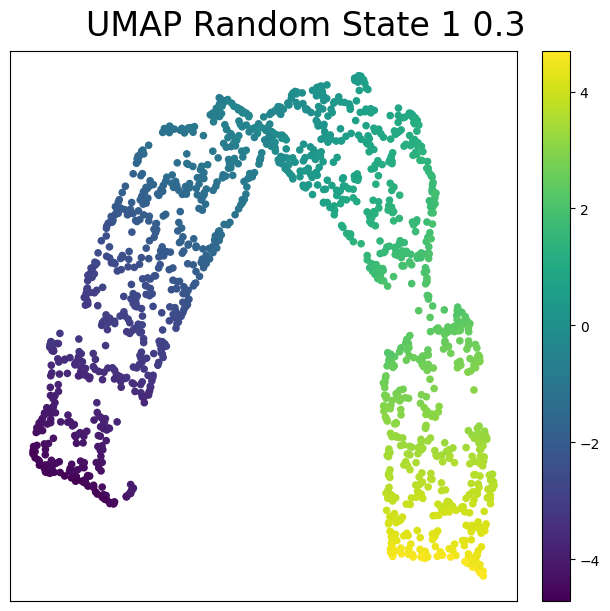

In [8]:
%load_ext autoreload
%autoreload 2

from util import pca, tsne, u_map
from sklearn import datasets, manifold
from util import plot_3d

n_samples = 1500
random_state =1
S_points, S_color = datasets.make_s_curve(n_samples, random_state=random_state)
plot_3d(S_points, S_color, "Original S-curve samples")
pca(S_points, S_color, "PCA of S-curve",'viridis')
tsne(S_points, S_color, "t-SNE Random State 0",'viridis',30,250,0)
tsne(S_points, S_color, "t-SNE Random State 1",'viridis',30,250,1)
tsne(S_points, S_color, "t-SNE Random State 2",'viridis',30,250,2)
# u_map(S_points, S_color, "UMAP Random State 0",'viridis',20,0.1,0)
# u_map(S_points, S_color, "UMAP Random State 1",'viridis',20,0.1,1)
u_map(S_points, S_color, "UMAP Random State 0 0.3",'viridis',20,0.3,0)
u_map(S_points, S_color, "UMAP Random State 1 0.3",'viridis',20,0.3,1)
# u_map(S_points, S_color, "UMAP Random State 0 40N",'viridis',40,0.1,0)
# u_map(S_points, S_color, "UMAP Random State 1 40N",'viridis',40,0.1,1)


In [130]:
%load_ext autoreload
%autoreload 2
import matplotlib
from util import pca, tsne, u_map

seed = 0
np.random.seed(seed)

def rng_ind(num_pts, X_train,X_test,y_train,y_test):
    assert len(X_train) >= num_pts
    train_pts = min(num_pts, len(X_train))
    test_pts = min(num_pts, len(X_test))

    inds_train = np.random.choice(len(X_train),(train_pts),False)
    inds_test = np.random.choice(len(X_test),(test_pts),False)
    xtrain = X_train[inds_train].reshape(train_pts,-1)
    xtest = X_test[inds_test].reshape(test_pts,-1)
    ytrain = y_train[inds_train]
    ytest = y_test[inds_test]

    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

    return xtrain,xtest,ytrain,ytest

mnist_items = rng_ind(10000,mnist.X_train,mnist.X_test,mnist.y_train,mnist.y_test)
wine_items = rng_ind(1000,wine.X_train_scaled,wine.X_test_scaled,wine.y_train,wine.y_test)

mnist.add(*mnist_items)
wine.add(*wine_items)
wine_cmap = matplotlib.colors.ListedColormap(['tab:red', 'tab:green', 'tab:blue','tab:purple', 'tab:brown','tab:orange'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
(10000, 784) (10000, 784) (10000,) (10000,)
(1028, 11) (115, 11) (1028,) (115,)
(1000, 11) (115, 11) (1000,) (115,)


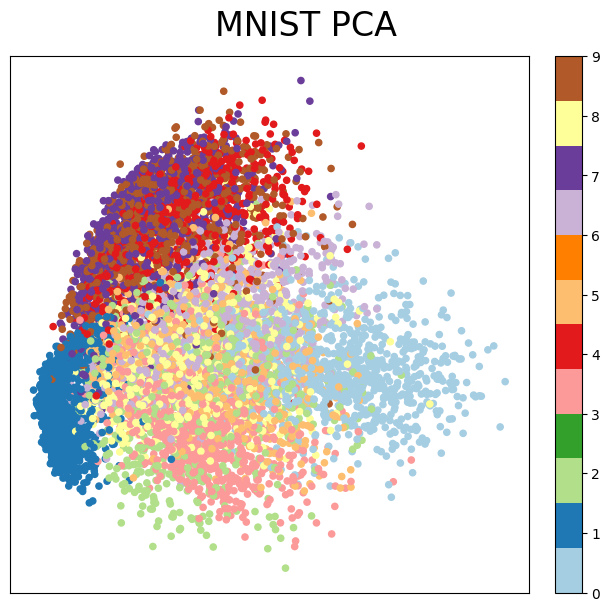

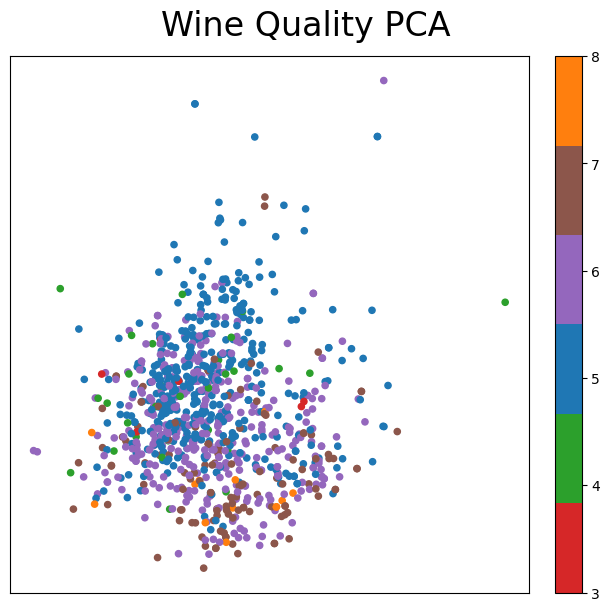

In [113]:
pca(mnist.xtrain,mnist.ytrain,'MNIST PCA')
pca(wine.xtrain,wine.ytrain,'Wine Quality PCA',wine_cmap)

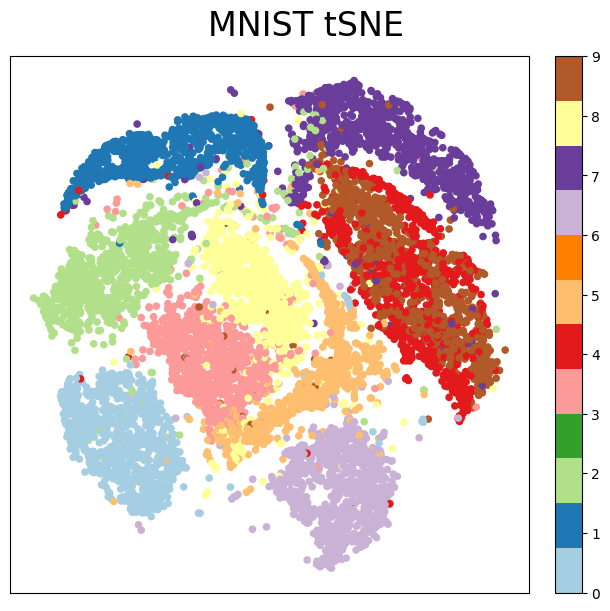

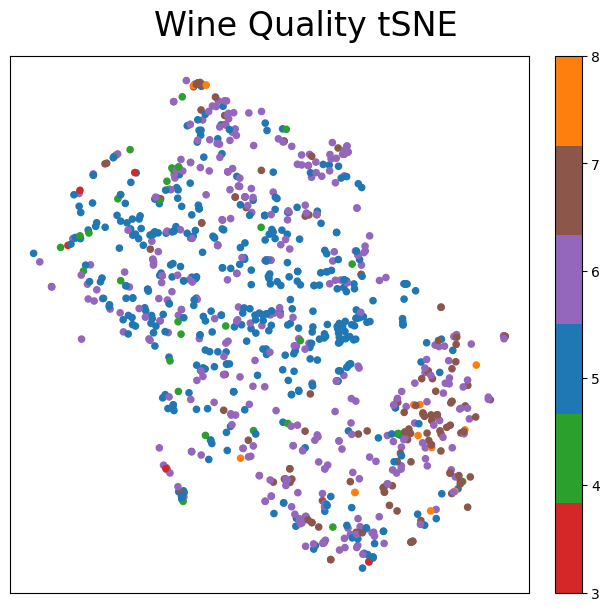

In [115]:
tsne(mnist.xtrain,mnist.ytrain,'MNIST tSNE')
tsne(wine.xtrain,wine.ytrain,'Wine Quality tSNE',wine_cmap)

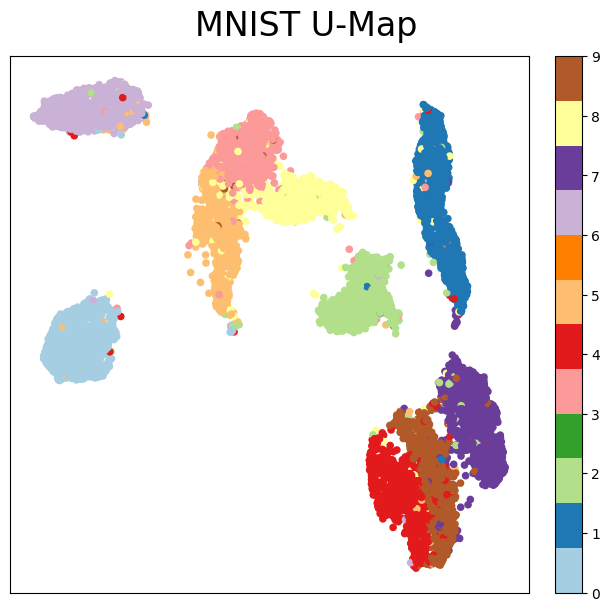

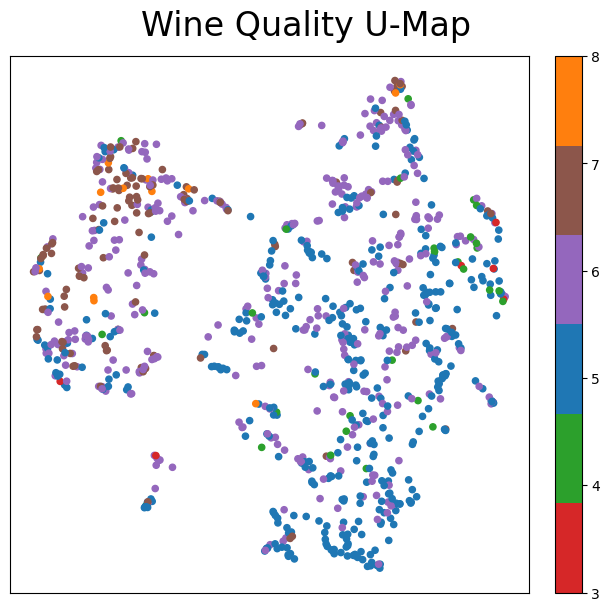

In [114]:
u_map(mnist.xtrain,mnist.ytrain,'MNIST U-Map')
u_map(wine.xtrain,wine.ytrain,'Wine Quality U-Map',wine_cmap)